# Exercício 1

Precisamos colocar um campo retangular com uma cerca. Temos 500 metros de cerca
e um edifício está em um lado do campo e por isso não precisa de nenhuma cerca neste lado.
Determine as dimensões do campo que vai envolver a maior área.


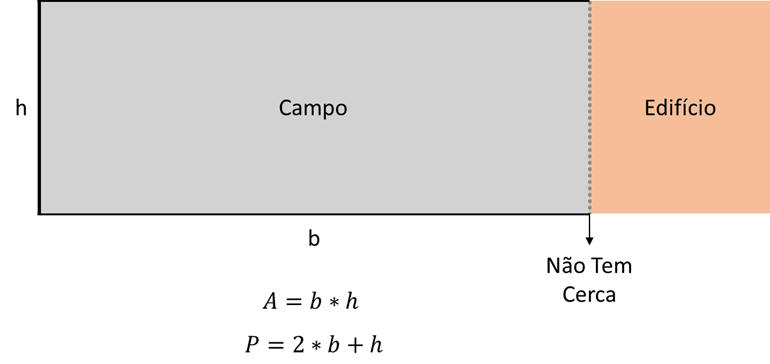

## Instalar pacote DEAP

In [3]:
!pip install deap

# Importar bibliotecas necessárias

In [4]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import operator
import random
import numpy
import math

## Partícula

part = [b,h]

   - **b**: Base
   - **h**: Altura



# Função objetivo

   - Função objetivo com objetivo de maximizar a area

In [5]:
def objective_function(individual):
    area = individual[0]*individual[1]
    return area,

# Restrição do problema


   - Verificar partícula - restrições impostas as partículas
       - Há uma restrição do tamanho do perímetro <= 500 

In [6]:
def feasible(individual):
    if 2*individual[0] + individual[1] > 500:
        return False
    return True

## Criando a função de Minimização e a estrutura da partícula

In [7]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, smin=None, smax=None, best=None) # smin e smax são limites de speed. best é a melhor até o momento.

## Definindo uma função para gerar a partícula

In [8]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [9]:
# Esta função calcula a velocidade, os limites de velocidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [10]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=2, pmin=0, pmax=500, smin=-3, smax=3)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -10000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [11]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [12]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [13]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [14]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [15]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg     	std   	min   	max    
0  	100  	-5297.13	8636.8	-10000	26489.3
1  	100  	-5023.71	8872.37	-10000	26053.8
2  	100  	-4881.26	9105.2 	-10000	26664.7
3  	100  	-5110.93	8778.6 	-10000	24965.7
4  	100  	-4615.11	9502.15	-10000	26450.7
5  	100  	-4488.67	9681.23	-10000	25861.7
6  	100  	-4712.93	9424.48	-10000	25201.3
7  	100  	-4576.89	9653.85	-10000	25638.6
8  	100  	-4436.8 	9895.33	-10000	26466.4
9  	100  	-4306.63	10102.7	-10000	26057  
10 	100  	-3812.4 	10740.8	-10000	26413  
11 	100  	-3679.94	10953.8	-10000	27561.9
12 	100  	-3685.27	10897.2	-10000	26820.9
13 	100  	-3542.03	11132.5	-10000	27267.3
14 	100  	-3403.27	11354.7	-10000	27378.4
15 	100  	-2886.53	11957.1	-10000	27933.7
16 	100  	-2738.35	12180.8	-10000	27910  
17 	100  	-2585.34	12416  	-10000	27933.7
18 	100  	-3963.08	11067.1	-10000	27414.5
19 	100  	-2717.2 	12425  	-10000	28759.9
20 	100  	-2227.29	12912.7	-10000	27982.3
21 	100  	-1723.88	13402.9	-10000	28435.7
22 	100  	-1982.07	13267.2	-10000	28

## Melhor indivíduo

In [16]:
print('x: ', best[0])
print('y: ', best[1])

x:  124.94614290447544
y:  250.10758963997506


## Avaliação do melhor indivíduo

In [17]:
feasible(best)

True

In [18]:
print('Area: ', best[0]*best[1])
print('Perímetro: ', 2*best[0] + best[1])

Area:  31249.978636650223
Perímetro:  499.99987544892593
